<a href="https://colab.research.google.com/github/AndiSulaehah/Andisulaehah/blob/main/Tugas1_Andi_Sulaehah_Ferial_Hollang_AVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving emisi.csv to emisi (1).csv


,Ville (L/100 km),Route (L/100 km),kombinasi (L/100 km),Emisi CO2 (g/km)
0,8.1,6.5,7.4,172
1,8.9,6.5,7.8,181
2,11.1,8.3,9.9,230
3,12.6,9.4,11.2,263
4,13.8,11.2,12.4,291


Matriks Korelasi:


,Ville (L/100 km),Route (L/100 km),kombinasi (L/100 km),Emisi CO2 (g/km)
Ville (L/100 km),1.000000,0.909671,0.986990,0.975617
Route (L/100 km),0.909671,1.000000,0.961539,0.951061
kombinasi (L/100 km),0.986990,0.961539,1.000000,0.988786
Emisi CO2 (g/km),0.975617,0.951061,0.988786,1.000000


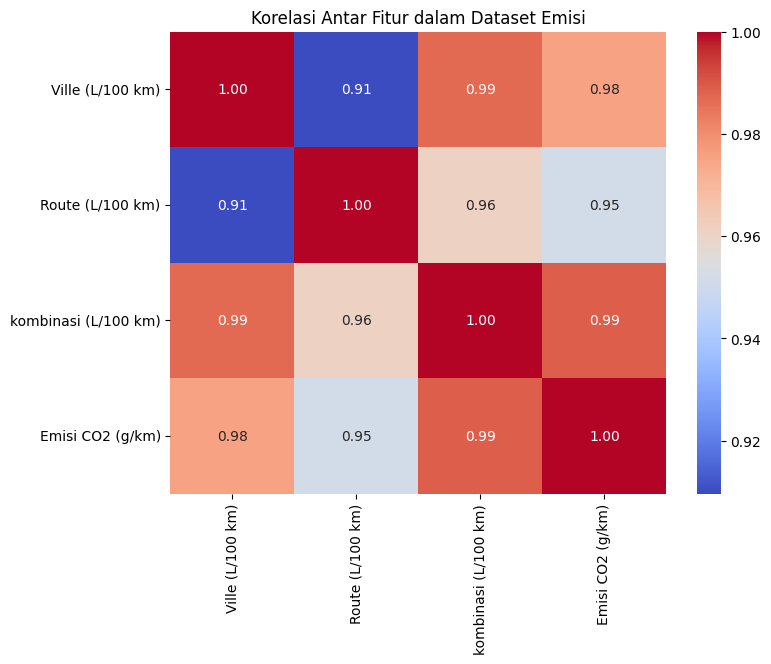

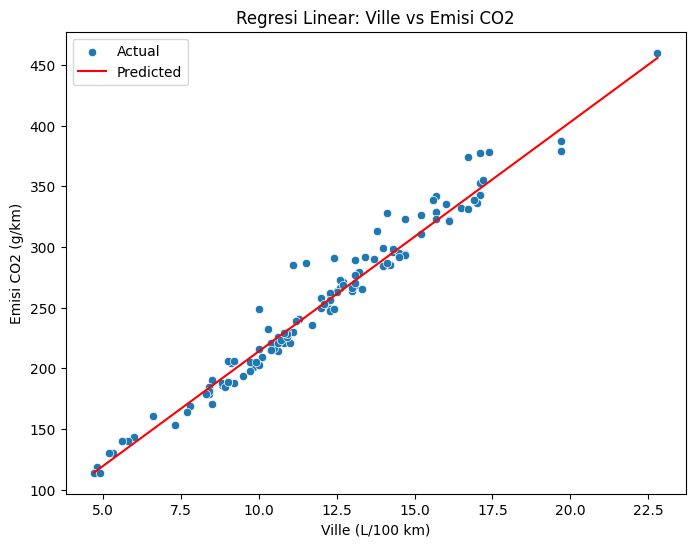

MAE: 8.46
MSE: 144.16
R² Score: 0.9668


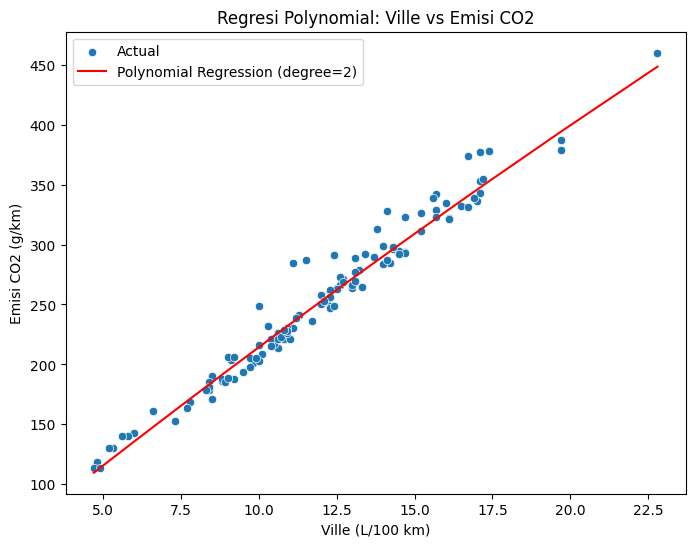

Polynomial MAE: 8.64
Polynomial MSE: 145.05
Polynomial R² Score: 0.9666


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import data dalam format CSV
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Menampilkan beberapa baris awal dataset
display(df.head())

# Menghitung matriks korelasi
correlation_matrix = df.corr()
print("Matriks Korelasi:")
display(correlation_matrix)

# Membuat matriks korelasi (Heatmap)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur dalam Dataset Emisi")
plt.show()

# Membuat model regresi sederhana
X = df[['Ville (L/100 km)']]
y = df['Emisi CO2 (g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Eksplorasi pengaruh Ville (L/100 km) ke Emisi CO2
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['Ville (L/100 km)'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Ville (L/100 km)'], y=y_pred, color='red', label="Predicted")
plt.xlabel("Ville (L/100 km)")
plt.ylabel("Emisi CO2 (g/km)")
plt.title("Regresi Linear: Ville vs Emisi CO2")
plt.legend()
plt.show()

# Evaluasi Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Membuat model regresi polynomial
degree = 2  # Bisa disesuaikan
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Visualisasi Regresi Polynomial
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['Ville (L/100 km)'], y=y_test, label="Actual")
X_test_sorted, y_pred_poly_sorted = zip(*sorted(zip(X_test['Ville (L/100 km)'], y_pred_poly)))
plt.plot(X_test_sorted, y_pred_poly_sorted, color='red', label=f"Polynomial Regression (degree={degree})")
plt.xlabel("Ville (L/100 km)")
plt.ylabel("Emisi CO2 (g/km)")
plt.title("Regresi Polynomial: Ville vs Emisi CO2")
plt.legend()
plt.show()

# Evaluasi Model Polynomial
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial MAE: {mae_poly:.2f}")
print(f"Polynomial MSE: {mse_poly:.2f}")
print(f"Polynomial R² Score: {r2_poly:.4f}")